# Домашнее задание: EDA и визуализация данных (Netflix)

В данной работе проводится разведочный анализ данных (EDA) датасета Netflix.
Цель - изучить структуру данных, основные распределения и сделать выводы
о контенте, представленном на платформе.
___

## 1. Первичный обзор данных

На данном этапе проводится первичное знакомство с датасетом:
изучается его размер, структура и типы данных.

Импортируем необходимые библиотеки для нашего исследования, загрузим датасет, посмотрим на его общий вид:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/RAVasiliev/Yandex---HSE---AI-VSOSH-2026/refs/heads/main/Week%201.%20ML%20Intro%2C%20Basic%20Libs/HW/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### Размер таблицы и список колонок

In [5]:
df.shape, df.columns.to_list()

((6234, 12),
 ['show_id',
  'type',
  'title',
  'director',
  'cast',
  'country',
  'date_added',
  'release_year',
  'rating',
  'duration',
  'listed_in',
  'description'])

### Типы данных

In [6]:
df.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Наличие пропусков в колонках

In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

### Анализ признаков

Числовые признаки:
- release_year

Категориальные признаки:
- show_id
- type
- title
- director
- cast
- country
- date_added
- rating
- duration
- listed_in
- description

"Грязные" или неоднозначные признаки:
- director, cast, country, date_added, duration - содержат пропуски.
- date_added - имеет тип object, хотя по смыслу является датой.
- duration - содержит числовое значение и текст одновременно.


### Barplot пропусков

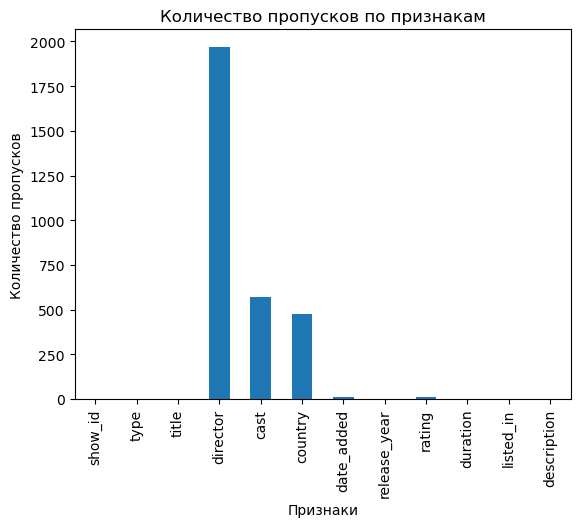

In [8]:
df.isna().sum().plot(kind='bar')
plt.title("Количество пропусков по признакам")
plt.xlabel("Признаки")
plt.ylabel("Количество пропусков")
plt.show()

Из графика видно, что наибольшее количество пропусков наблюдается
в колонках cast, director и country. Эти признаки требуют дополнительной
обработки перед использованием в моделях.

---

## 2. Типы контента и структура каталога

Проанализируем соотношение фильмов и сериалов на платформе,
а также динамику добавления нового контента по годам.


### Соотношение фильмов и сериалов


In [9]:
df['type'].value_counts()

type
Movie      4265
TV Show    1969
Name: count, dtype: int64

Визуализируем.

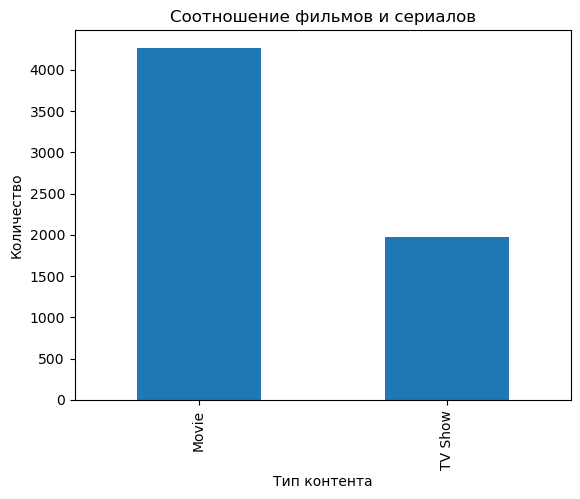

In [10]:
df['type'].value_counts().plot(kind='bar')
plt.title("Соотношение фильмов и сериалов")
plt.xlabel("Тип контента")
plt.ylabel("Количество")
plt.show()

В каталоге Netflix преобладают фильмы.
Это означает, что платформа в большей степени ориентирована
на полнометражный контент.

### Динамика добавления тайтлов по годам

Для анализа используем колонку date_added, которая отражает
момент появления контента на платформе.

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

При преобразовании даты использовался параметр errors='coerce',
чтобы некорректные или пропущенные значения не вызывали ошибку
и были заменены на NaT.

Визуализируем.

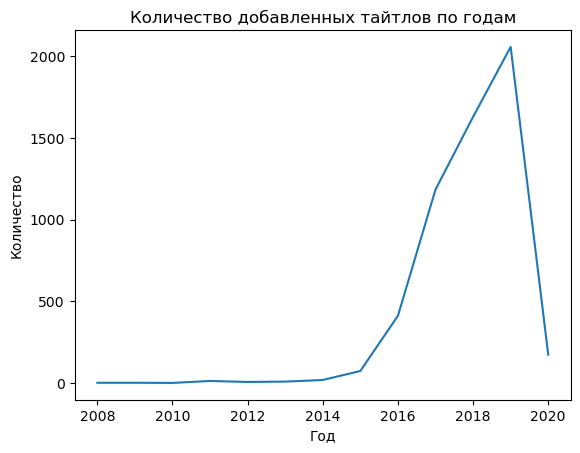

In [12]:
df['year_added'].value_counts().sort_index().plot()
plt.title("Количество добавленных тайтлов по годам")
plt.xlabel("Год")
plt.ylabel("Количество")
plt.show()

Можно заметить устойчивый рост количества добавляемого контента
с течением времени, особенно после 2015 года.
Это говорит об активном расширении библиотеки Netflix.

### Динамика для фильмов и сериалов отдельно

Сгруппируем контент по году добавления на платформу и типу, посчитаем количество добавленного контента по годам, разъединим мульти-индексы.

In [13]:
grouped = df.groupby(['year_added', 'type']).size().unstack()
grouped.head(3)

type,Movie,TV Show
year_added,,
2008.0,1.0,1.0
2009.0,2.0,NaN
2010.0,1.0,NaN


Визуализируем.

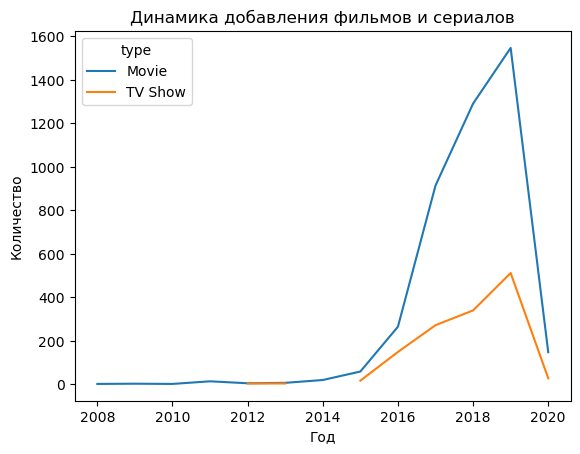

In [14]:
grouped.plot()
plt.title("Динамика добавления фильмов и сериалов")
plt.xlabel("Год")
plt.ylabel("Количество")
plt.show()

Из графика видно, что количество добавляемых фильмов растёт быстрее,
чем количество сериалов, однако сериалы также демонстрируют
положительную динамику. Кроме того, в период с 2013 по 2015 Netflix не добавил ни одного сериала, но стал активно добавлять их после 2015.

Таким образом, Netflix активно расширяет каталог,
делая больший упор на фильмы, но при этом развивая и сериальный сегмент.

---

## 3. География контента

Проанализируем, какие страны выпускают больше всего контента.


### Подсчёт стран

Признак country представлен строкой, поэтому создадим новый признак со списком всех стран-производителей. Для этого сплитим по запятой значение признака country и удаляем лишние пробелы в названиях стран.

In [15]:
df['country_list'] = df['country'].str.split(',') \
    .apply(
        lambda x: [c.strip() for c in x] if isinstance(x, list) else []
    )

Теперь считаем количество стран производителей. Для этого применяем метод explode() - он преобразовывает список в строки с каждым из его элементов.

In [16]:
countries_exploded = df.explode('country_list')
countries_exploded['country_list'].value_counts()

country_list
United States     2610
India              838
United Kingdom     602
Canada             318
France             271
                  ... 
Liechtenstein        1
Latvia               1
Uganda               1
Montenegro           1
Cyprus               1
Name: count, Length: 111, dtype: int64

### Топ-10 стран производителей

Визуализируем топ-10 стран по количеству тайтлов.

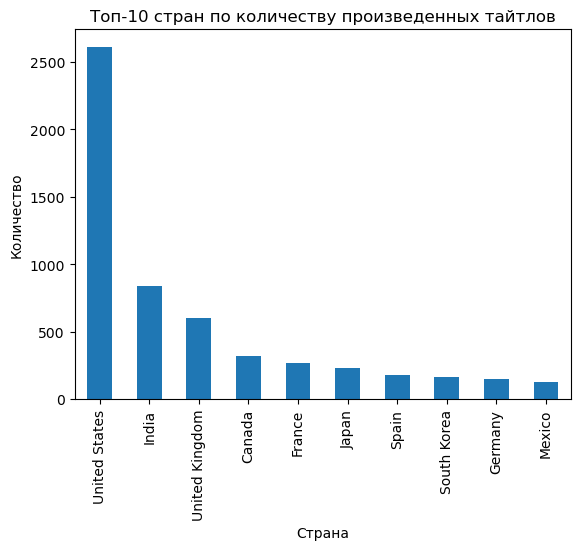

In [17]:
country_counts = countries_exploded['country_list'].value_counts()
country_counts.head(10).plot(kind='bar')
plt.title('Топ-10 стран по количеству произведенных тайтлов')
plt.xlabel('Страна')
plt.ylabel('Количество')
plt.show()

Наибольшее количество контента производится в США, что логично, так как
Netflix является американской компанией.

### Анализ неравномерности распределения и доля топ-5 стран vs остальных по контенту

Посмотрим, насколько неравномерное распределение фильмов по странам. Для этого разделим количество произведенного контента по странам на суммарное количество контента.

In [18]:
country_shares = country_counts / country_counts.sum()
country_shares.head()

country_list
United States     0.363409
India             0.116681
United Kingdom    0.083821
Canada            0.044277
France            0.037733
Name: count, dtype: float64

In [19]:
int(country_counts.count())

111

In [20]:
float(country_shares.head().sum() * 100)

64.59203564466722

Как видно из подсчёта долей стран-производителей, распределение крайне неравномерное: топ-5 стран производят ~64.6% фильмов на платформе, в то время как для остальных 106 стран приходится чуть больше чем 35%.

Провизуализируем для наглядности. Для этого сделаем объект pd.Series, содержащий количество фильмов топ-5 стран по отдельности и остальных в совокупности.

In [21]:
top5_sum = country_counts.head(5).sum()
others_sum = country_counts[5:].sum()

top5_vs_others = pd.Series(
    data=[top5_sum, others_sum],
    index=['Топ-5', 'Остальные']
)
top5_vs_others

Топ-5        4639
Остальные    2543
dtype: int64

Визуализируем.

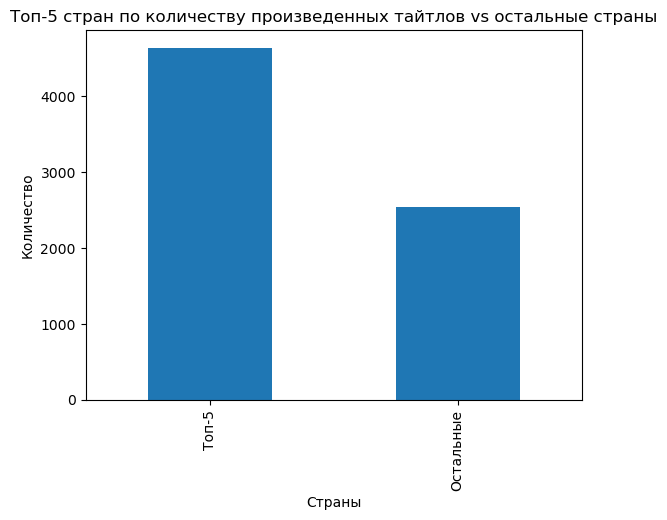

In [22]:
top5_vs_others.plot(kind='bar')
plt.title('Топ-5 стран по количеству произведенных тайтлов vs остальные страны')
plt.xlabel('Страны')
plt.ylabel('Количество')
plt.show()

PS: Для оценки неравномерности данных можно задействовать коэффициент Джини по всей выборке: чем он ближе к 1 - тем неравномернее данные.

In [23]:
gini = 1 - sum([share ** 2 for share in country_shares])
gini

0.8391009470828903

Как видно из расчёта, данные крайне неравномерные.

---

## 4. Жанры

Проанализируем, какие жанры преобладают на платформе.

Признак listed_in представлен в виде строки, поэтому проделаем все то же самое, что и для стран.

In [24]:
df['genres_list'] = df['listed_in'].str.split(',') \
    .apply(
        lambda x: [c.strip() for c in x] if isinstance(x, list) else []
    )

genres_exploded = df.explode('genres_list')
genres_counts = genres_exploded['genres_list'].value_counts()
genres_counts.head()

genres_list
International Movies      1927
Dramas                    1623
Comedies                  1113
International TV Shows    1001
Documentaries              668
Name: count, dtype: int64

Визуализируем топ-10 жанров на Netflix.

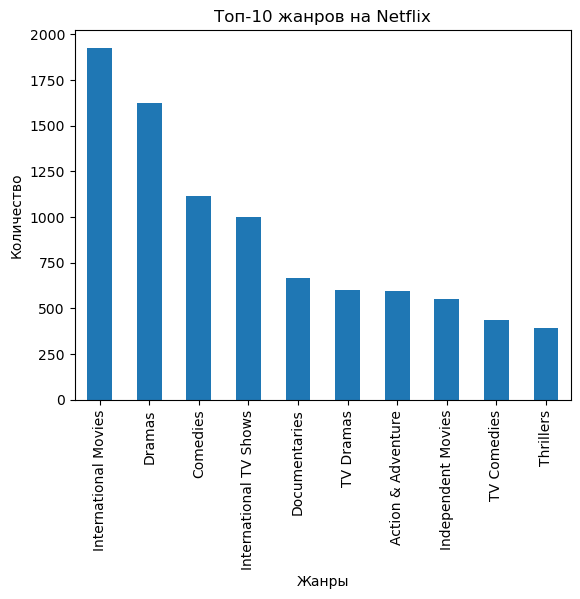

In [25]:
genres_counts.head(10).plot(kind='bar')
plt.title('Топ-10 жанров на Netflix')
plt.xlabel('Жанры')
plt.ylabel('Количество')
plt.show()

Теперь выведем топ-10 жанров относительно каждого типа контента.

In [26]:
movies = genres_exploded[genres_exploded['type'] == 'Movie']
shows = genres_exploded[genres_exploded['type'] == 'TV Show']

movies_genres_counts = movies['genres_list'].value_counts()
shows_genres_counts = shows['genres_list'].value_counts()

Для фильмов:

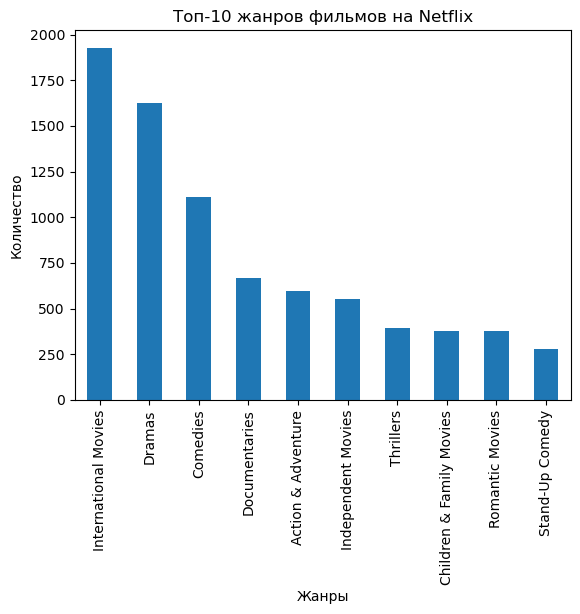

In [27]:
movies_genres_counts.head(10).plot(kind='bar')
plt.title('Топ-10 жанров фильмов на Netflix')
plt.xlabel('Жанры')
plt.ylabel('Количество')
plt.show()

Для сериалов:

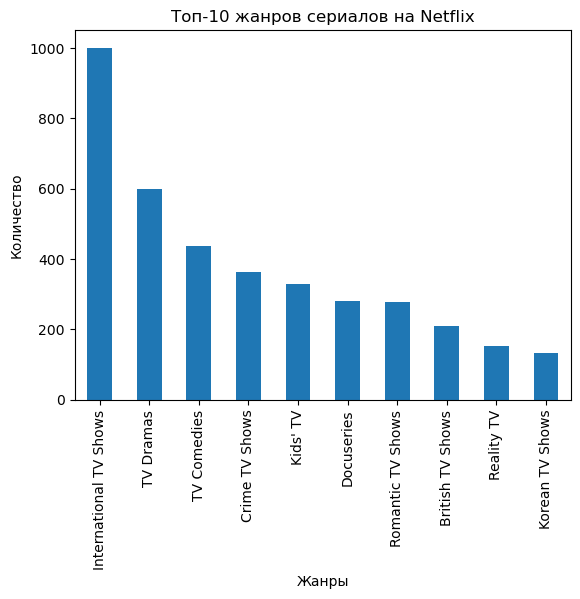

In [28]:
shows_genres_counts.head(10).plot(kind='bar')
plt.title('Топ-10 жанров сериалов на Netflix')
plt.xlabel('Жанры')
plt.ylabel('Количество')
plt.show()

Из обоих графиков видно, что в зависимости от типа контента преобладают разные жанры. По графикам можно сделать некоторые выводы:
- Преобладание International Movies следует из природы Netflix: на платформе больше фильмов, чем сериалов, как говорилось ранее в исследовании.
- Драмы и комедии - универсальные жанры для обоих типов контента.

Посчитаем индекс Джини для распределений жанров между фильмами и сериалами отдельно.

In [29]:
movies_counts = movies['genres_list'].value_counts()
shows_counts = shows['genres_list'].value_counts()

movies_shares = movies_counts / movies_counts.sum()
shows_shares = shows_counts / shows_counts.sum()

movies_gini = 1 - sum([share ** 2 for share in movies_shares])
shows_gini = 1 - sum([share ** 2 for share in shows_shares])

movies_gini, shows_gini

(0.8864571490876749, 0.8992119828939685)

Из расчёта видно, что распределения примерно одинаковые.

### Редкие жанры

Давайте посмотрим, есть ли в нашем датасете жанры, которые встречаются заметно реже остальных. Будем считать, что "редко встречающимся фильмом" будет жанр, упомянутый менее 10% от медианы количества жанров.

In [30]:
median_value = genres_counts.median()
threshold = median_value * 0.1
genres_counts[genres_counts < threshold]

genres_list
TV Shows    10
Name: count, dtype: int64

Да, в нашем датасете есть крайне редко встречающийся среди остальных жанр - TV Shows

---

## 5. Возрастные рейтинги
Проанализируем, какие возрастные рейтинги встречаются чаще всего.

In [31]:
rating_counts = df['rating'].value_counts()
rating_counts

rating
TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: count, dtype: int64

Визуализируем.

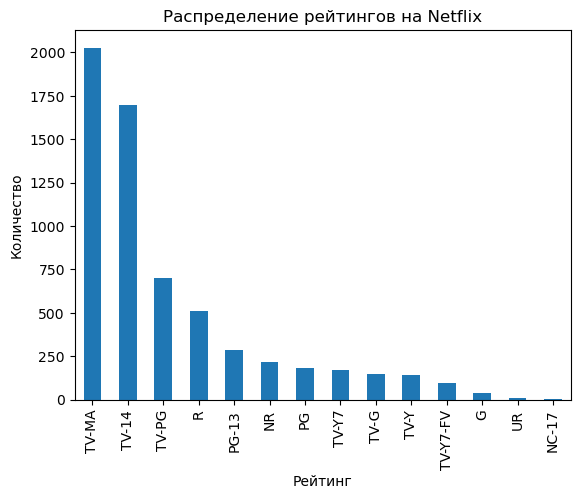

In [32]:
rating_counts.plot(kind='bar')
plt.title('Распределение рейтингов на Netflix')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

Из графика видно, что самые частые рейтинги на Netflix - это TV-MA (контент для взрослых) и TV-14 (подростковый контент).

Посмотрим, есть ли различия в рейтингах для фильмов и сериалов. Воспользуемся дасетами movies и shows из п. 4.

In [33]:
movies_rating_counts = movies['rating'].value_counts()
shows_rating_counts = shows['rating'].value_counts()

Для фильмов:

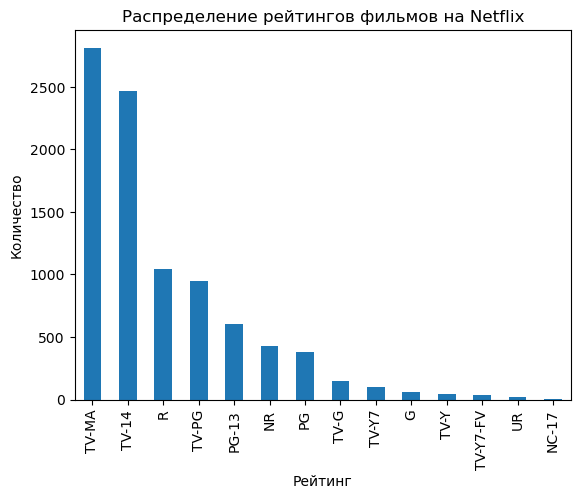

In [34]:
movies_rating_counts.plot(kind='bar')
plt.title('Распределение рейтингов фильмов на Netflix')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

Для сериалов

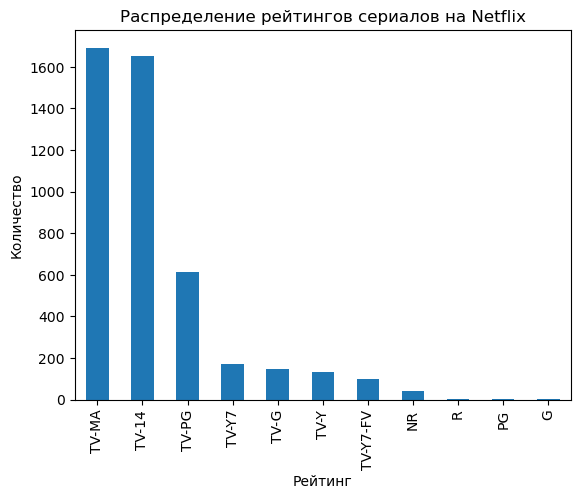

In [35]:
shows_rating_counts.plot(kind='bar')
plt.title('Распределение рейтингов сериалов на Netflix')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

Из графиков можно сделать следующие выводы:
- В обоих типах контента преобладают все те же TV-MA и TV-14
- Среди сериалов почти нет контента с рейтингами R, PG и G

### Редкие рейтинги

Давайте посмотрим, есть ли в нашем датасете рейтинги, которые встречаются заметно реже остальных. Будем считать, что "редко встречающимся рейтингом" будет рейтинг, упомянутый менее 10% от медианы количества рейтингов.

In [36]:
median_rating = rating_counts.median()
rating_threshold = median_rating * 0.1
rating_counts[rating_counts < rating_threshold]

rating
UR       7
NC-17    2
Name: count, dtype: int64

Да, в нашем датасете есть крайне редко встречающиеся среди остальных рейтинги - UR и NC-17.

---

## 6. Длительность контента

Длительности для разных типов конента отличаются по представлению: для фильмов она указывается в минутах, для сериалов - в количестве сезонов.

Построим график распределения длительностей фильмов.

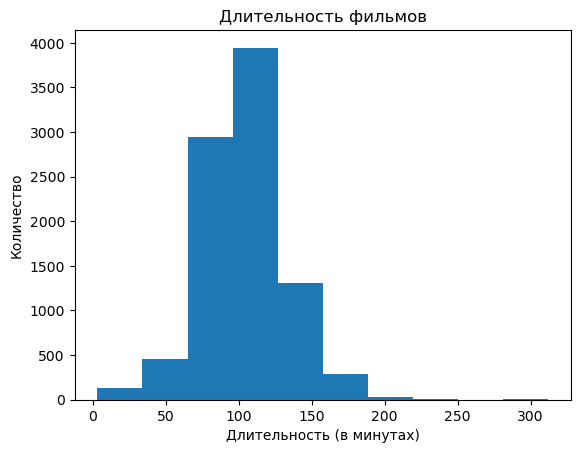

In [61]:
movies_duration_counts = movies['duration'].dropna().str.extract('(\d+)').astype(float)

plt.hist(movies_duration_counts)
plt.title('Длительность фильмов')
plt.xlabel('Длительность (в минутах)')
plt.ylabel('Количество')
plt.show()

Из графика видно, что среднее значение длительности - ~100-125 минут

Построим Boxplot для длительности фильмов.

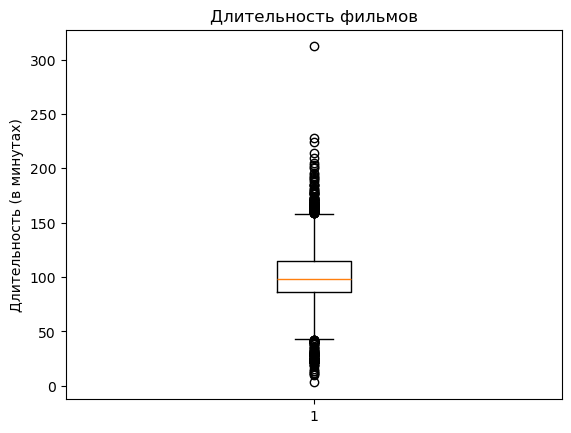

In [55]:
plt.boxplot(movies_duration_counts)
plt.title('Длительность фильмов')
plt.ylabel('Длительность (в минутах)')
plt.show()

Выбросы есть: фильмы сверх 300 минут и фильм, длительностью 1 минуту.

Построим Barplot для длительности сериалов.

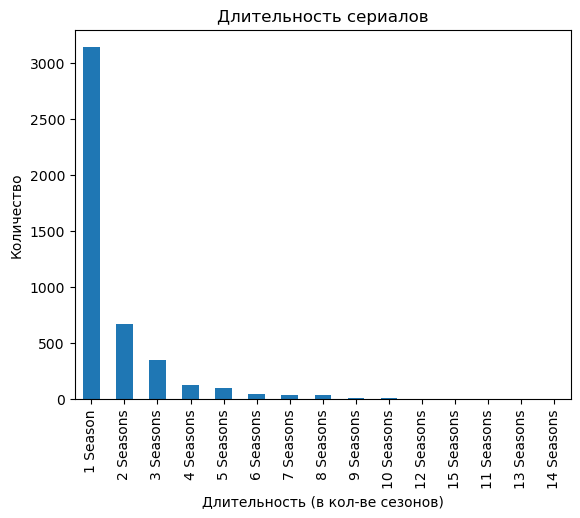

In [56]:
shows_duration_counts = shows['duration'].value_counts()

shows_duration_counts.plot(kind='bar')
plt.title('Длительность сериалов')
plt.ylabel('Количество')
plt.xlabel('Длительность (в кол-ве сезонов)')
plt.show()

Из графика видно, что обычно в сериалах 1-3 сезона.

## 7. Временные эффекты
Посмотрим, есть ли сезонность добавления контента на Netflix.

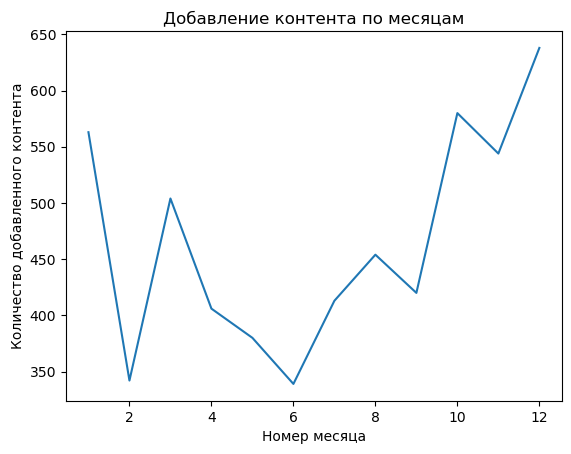

In [57]:
df['month_added'] = df['date_added'].dt.month
monthly_counts = df['month_added'].value_counts().sort_index()

monthly_counts.plot(kind='line')
plt.title('Добавление контента по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Количество добавленного контента')
plt.show()

Из графика видно, что сезонность имеется: топ-3 месяца по добавлению контента это октябрь, ноябрь и декабрь.

Построим тепловую карту, чтобы увидеть, меняется ли сезонность со временем.

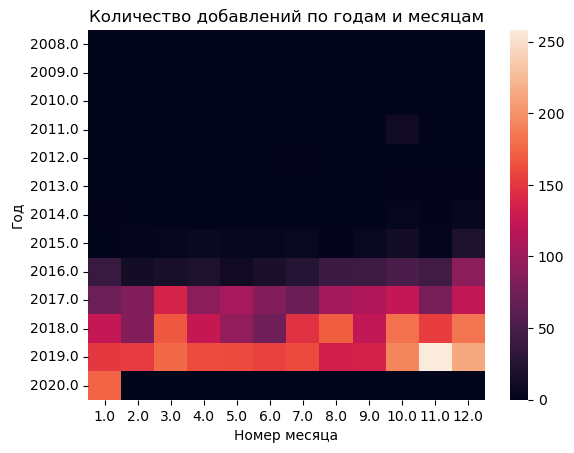

In [58]:
pivot = df.pivot_table(
    index='year_added', columns='month_added',
    values='title', aggfunc='count', fill_value=0
)

sns.heatmap(pivot)
plt.xlabel('Номер месяца')
plt.ylabel('Год')
plt.title('Количество добавлений по годам и месяцам')
plt.show()

Из тепловой карты видно, что до 2014 года включительно сезонности как таковой не было, потому что контента добавлялось мало. Начиная с 2015 года, начинает вырисовываться сезонность, которая по самую последнюб дату датасета остается той же.

## 8. Итоговые выводы

### 3 самых интересных наблюдения
- Контент на Netflix добавляется неравномерно в течение года: чётко прослеживается сезонность с пиками в октябре–декабре и марте. Это, вероятно, связано с праздничными каникулами и стратегией платформы привлекать зрителей в периоды высокого спроса.
- Категория «International Movies» значительно превосходит по количеству остальные жанры, что отражает глобальный охват платформы и ориентацию на разнообразную аудиторию.
- С 2016 по 2019 год наблюдался резкий рост количества добавляемого контента, что коррелирует с экспансией Netflix на международные рынки и увеличением производства оригинального контента.

### Две проблемы качества данных:

- В столбце date_added встречаются пропуски и некорректные форматы (например, даты записаны как текст с названием месяца), что требует дополнительной предобработки.

- В столбце country многие записи содержат несколько стран через запятую, а также присутствуют пропуски, что затрудняет агрегацию по странам и требует аккуратного разделения.

## Идея для ML-задачи:

На основе имеющихся признаков (жанр, страна, год выпуска, длительность, описание) можно построить модель классификации для предсказания рейтинга (rating), например, чтобы автоматически присваивать возрастные ограничения новым фильмам или рекомендовать контент пользователям в зависимости от их предпочтений. Это поможет улучшить персонализацию рекомендательной системы.

Эти выводы позволяют лучше понять структуру каталога Netflix, выявить закономерности в пополнении библиотеки и определить направления для дальнейшего углублённого анализа с использованием методов машинного обучения.
